In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/raw.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44


In [5]:
df.shape

(1001, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1001 non-null   object
 1   race_ethnicity               1001 non-null   object
 2   parental_level_of_education  1001 non-null   object
 3   lunch                        1001 non-null   object
 4   test_preparation_course      1001 non-null   object
 5   math_score                   1001 non-null   int64 
 6   reading_score                1001 non-null   int64 
 7   writing_score                1001 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.7+ KB


### Data Check to Perform
- Check Missing Values
- Check Duplicates
- Check Data Type
- Check the number of unique values of each column
- Check stats
- Check various categorical present in the different categories column

### Check Missing Values

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there are no missing values in the dataset

### Check Duplicates

In [10]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

now there are no duplicates in our dataser

### Check Data Type

In [15]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### Check the number of unique values of each column

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

1. here we can see that there are many unique values in each column 
2. we will fix them in feature engineering

### check stats

In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring the Dataset

In [18]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88


In [23]:
print("Categrories in 'Gender' variable")
print(df["gender"].unique())

print("Categrories in 'race_ethnicity' variable")
print(df["race_ethnicity"].unique())

print("Categrories in 'parental_level_of_education' variable")
print(df["parental_level_of_education"].unique())

print("Categrories in 'lunch' variable")
print(df["lunch"].unique())

print("Categrories in 'test_preparation_course' variable")
print(df["test_preparation_course"].unique())

# print("Categrories in 'math_score' variable", end=" ")
# print(df["math_score"].unique())

# print("Categrories in 'reading_score' variable", end=" ")
# print(df["reading_score"].unique())

# print("Categrories in 'writing_score' variable", end=" ")
# print(df["writing_score"].unique())

Categrories in 'Gender' variable
['female' 'male']
Categrories in 'race_ethnicity' variable
['group B' 'group C' 'group A' 'group D' 'group E']
Categrories in 'parental_level_of_education' variable
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categrories in 'lunch' variable
['standard' 'free/reduced']
Categrories in 'test_preparation_course' variable
['none' 'completed']


### define numerical and categorical column

In [36]:
numerical_col = [feature for feature in df.columns if df[feature].dtype != "O"]
categroical_col = [feature for feature in df.columns if df[feature].dtype == "O"]

In [37]:
numerical_col

['math_score', 'reading_score', 'writing_score']

In [38]:
categroical_col

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Adding columns for "Total Score" and "Average"

In [39]:
df["total score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total score"]/3

In [40]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
2,female,group C,some college,standard,completed,69,90,88,247,82.333333


### Analying how many students score full marks in "math_score	, reading_score	, writing_score"

In [43]:
math_full = df[df["math_score"] == 100]["average"].count()
reading_full = df[df["reading_score"] == 100]["average"].count()
writing_full = df[df["writing_score"] == 100]["average"].count()

In [44]:
print("Number of students with full marks in math ", math_full)
print("Number of students with full marks in reading score ", reading_full)
print("Number of students with full marks in writing score " , writing_full)

Number of students with full marks in math  7
Number of students with full marks in reading score  17
Number of students with full marks in writing score  14


### Analying how many students have failed in "math_score , reading_score , writing_score"

In [50]:
math_fail = df[df["math_score"] < 35]["average"].count()
reading_fail = df[df["reading_score"] < 35]["average"].count()
writing_fail = df[df["writing_score"] < 35]["average"].count()

In [51]:
print("Number of students fail in math ", math_fail)
print("Number of students fail in reading score ", reading_fail)
print("Number of students fail in writing score " , writing_fail)

Number of students fail in math  22
Number of students fail in reading score  15
Number of students fail in writing score  17


### Exploring Data Visualization

#### visualize the averag score distribution to make conclusion
1. histogram
2. kde

<Axes: xlabel='average', ylabel='Count'>

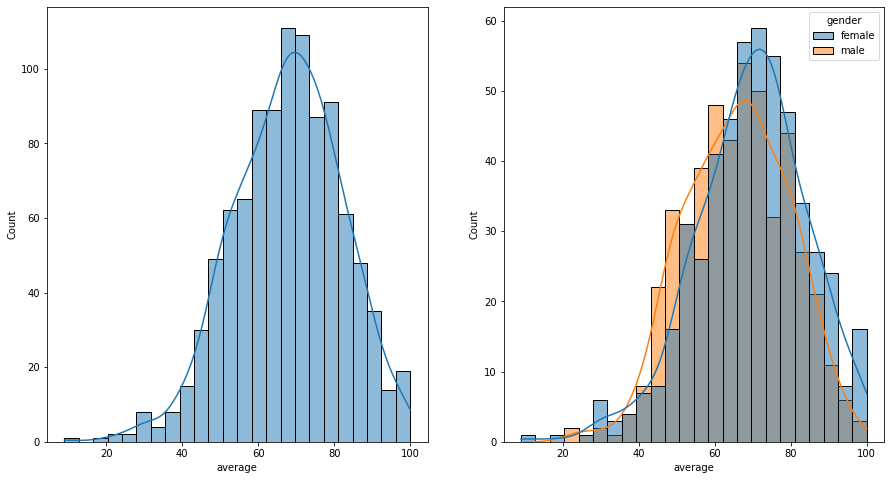

In [56]:
plt.subplots(1,2, figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df , x = "average", kde = True)
plt.subplot(122)
sns.histplot(data=df, x="average", kde = True , hue="gender")

<Axes: xlabel='total score', ylabel='Count'>

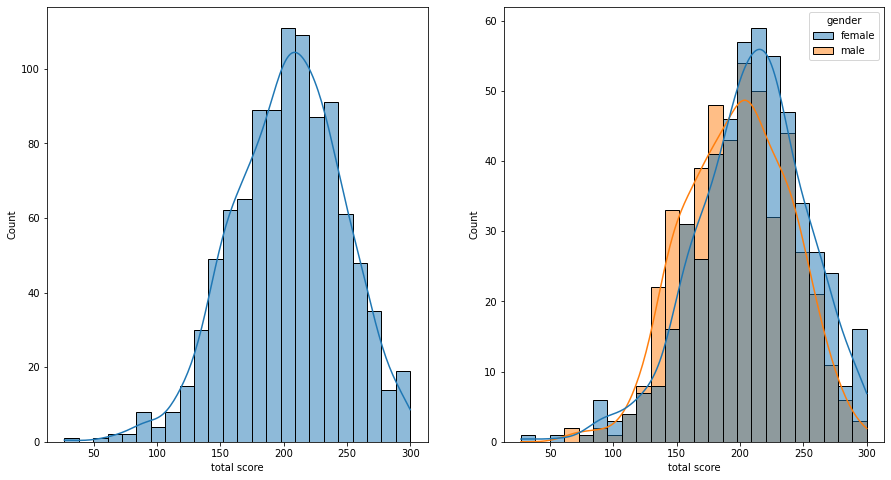

In [58]:
plt.subplots(1,2 , figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df, x="total score", kde=True)
plt.subplot(122)
sns.histplot(data=df, x="total score", kde=True,hue="gender")

observation:
    we can see that female has score better than males

<ipython-input-73-6fefaacac2fd>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-73-6fefaacac2fd>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-73-6fefaacac2fd>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

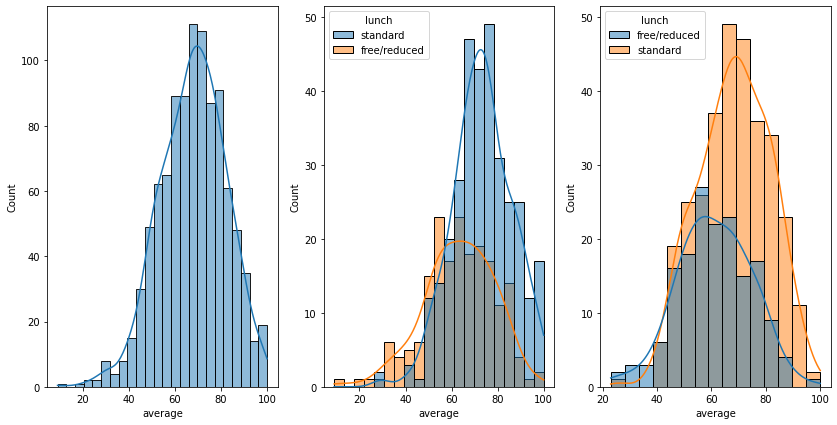

In [73]:
plt.subplots(1,3 , figsize=(19,7))
plt.subplot(141)
sns.histplot(data = df, x = "average", kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender == "female"], x = "average", hue="lunch",kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender == "male"], x = "average", hue="lunch",kde=True)

<ipython-input-81-b6768f009942>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)


<Axes: xlabel='average', ylabel='Count'>

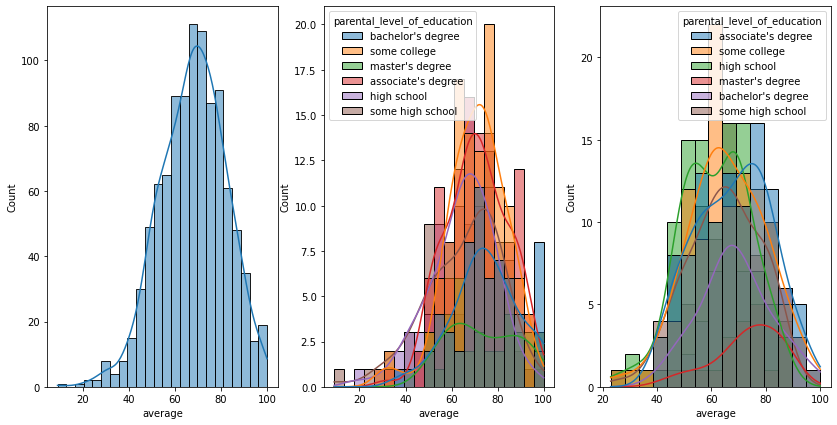

In [81]:
plt.subplots(1,1, figsize=(19,7))
plt.subplot(141)
sns.histplot(data = df, x = "average", kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender == "female"], x = "average", hue="parental_level_of_education",kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender == "male"], x = "average", hue="parental_level_of_education",kde=True)